In [1]:
# !pip install simpy
import random
import simpy
import numpy as np
import matplotlib.pyplot as plt


RANDOM_SEED = 42
NEW_CUSTOMERS = 100  # Total number of customers
INTERVAL_CUSTOMERS = 10.0  # Generate new customers roughly every x seconds
MIN_PATIENCE = 1  # Min. customer patience
MAX_PATIENCE = 3  # Max. customer patience
VALOR_D = 0.002

tiempo_fila = []

random.seed(RANDOM_SEED)

In [2]:
def media_recursiva(media_anterior, valor_actual, j):
    return media_anterior + ( (valor_actual - media_anterior) / (j + 1.0))

def varianza_recursiva(media_anterior, media_actual, varianza_anterior, j):
    primera_parte = 1 - ( 1.0 / j)
    segunda_parte = primera_parte * varianza_anterior
    
    tercera_parte = j + 1
    cuarta_parte = ((media_actual - media_anterior) ** 2 ) * tercera_parte
    return cuarta_parte + segunda_parte

def validar_confianza(varianza, k):
    value = (1.96 * varianza) / (k ** (1 / 2))
    print('{} < D? Where D = {}'.format(value, VALOR_D))
    return  value < VALOR_D

In [3]:
def source(env, number, interval, counter):
    """Source generates customers randomly"""
    for i in range(number):
        c = customer(env, 'Customer%02d' % i, counter, time_in_bank=12.0)
        env.process(c)
        t = random.expovariate(1.0 / interval)
        yield env.timeout(t)


def customer(env, name, counter, time_in_bank):
    """Customer arrives, is served and leaves."""
    arrive = env.now
    # print('%7.4f %s: Here I am' % (arrive, name))

    with counter.request() as req:
        patience = random.uniform(MIN_PATIENCE, MAX_PATIENCE)
        # Wait for the counter or abort at the end of our tether
        results = yield req | env.timeout(patience)

        wait = env.now - arrive
        tiempo_fila.append(wait)

        if req in results:
            # We got to the counter
            # print('%7.4f %s: Waited %6.3f' % (env.now, name, wait))

            tib = random.expovariate(1.0 / time_in_bank)
            yield env.timeout(tib)
            # print('%7.4f %s: Finished' % (env.now, name))

        else:
            # We reneged
            # print('%7.4f %s: RENEGED after %6.3f' % (env.now, name, wait))
            pass

El valor del promedio en la última ejecución es de: 1.0704282296194496
El valor de la varianza en la última ejecución es de: 0.014176206742973896
0.0027785365216228836 < D? Where D = 0.002
Se cumple la confianza: False


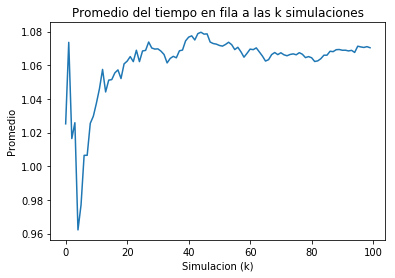

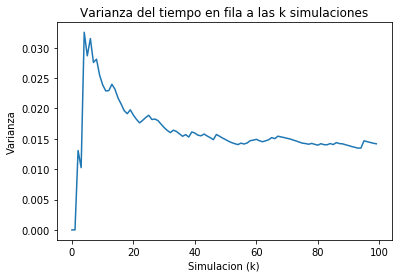

In [4]:
# Setup and start the simulation
random.seed(RANDOM_SEED)

promedio_desempeño_tiempo_fila_anterior = 0
promedio_desempeño_tiempo_fila = 0
varianza_tiempo_fila = 0

promedios = []
varianzas = []

for i in range(100):
    tiempo_fila = []
    env = simpy.Environment()

    # Start processes and run
    counter = simpy.Resource(env, capacity=1)
    env.process(source(env, NEW_CUSTOMERS, INTERVAL_CUSTOMERS, counter))
    env.run()
    
    promedio_tiempo_fila = np.mean(tiempo_fila)
    
    if i >= 1:
        promedio_desempeño_tiempo_fila = media_recursiva(promedio_desempeño_tiempo_fila, promedio_tiempo_fila, i + 1)
    else:
        promedio_desempeño_tiempo_fila = promedio_tiempo_fila
        
    if i >= 2:
        varianza_tiempo_fila = varianza_recursiva(
            promedio_desempeño_tiempo_fila_anterior,
            promedio_desempeño_tiempo_fila,
            varianza_tiempo_fila,
            i + 1)
        
    promedio_desempeño_tiempo_fila_anterior = promedio_desempeño_tiempo_fila
    
    # print('X_{}: {}'.format(i + 1, promedio_desempeño_tiempo_fila))
    # print('S_{}: {}'.format(i + 1, varianza_tiempo_fila))
    # print('-----')
    
    promedios.append(promedio_desempeño_tiempo_fila)
    varianzas.append(varianza_tiempo_fila)
    
print('El valor del promedio en la última ejecución es de: {}'.format(promedios[-1]))
print('El valor de la varianza en la última ejecución es de: {}'.format(varianzas[-1]))
print('Se cumple la confianza: {}'.format(validar_confianza(varianzas[-1], len(varianzas))))

plt.title('Promedio del tiempo en fila a las k simulaciones')
plt.xlabel('Simulacion (k)')
plt.ylabel('Promedio')
plt.plot(promedios)
plt.show()

plt.title('Varianza del tiempo en fila a las k simulaciones')
plt.xlabel('Simulacion (k)')
plt.ylabel('Varianza')
plt.plot(varianzas)
plt.show()

El valor del promedio en la última ejecución es de: 1.0817191662126413
El valor de la varianza en la última ejecución es de: 0.013832498395196013
0.0008573471329250889 < D? Where D = 0.002
Se cumple la confianza: True


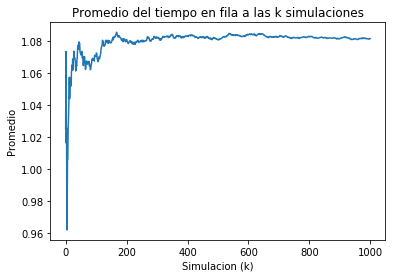

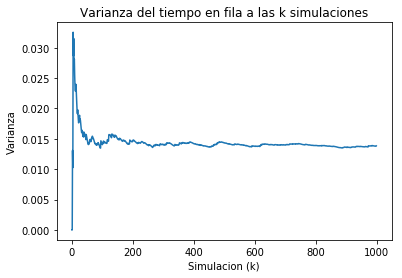

In [5]:
# Setup and start the simulation
random.seed(RANDOM_SEED)

promedio_desempeño_tiempo_fila_anterior = 0
promedio_desempeño_tiempo_fila = 0
varianza_tiempo_fila = 0

promedios = []
varianzas = []

for i in range(1000):
    tiempo_fila = []
    env = simpy.Environment()

    # Start processes and run
    counter = simpy.Resource(env, capacity=1)
    env.process(source(env, NEW_CUSTOMERS, INTERVAL_CUSTOMERS, counter))
    env.run()
    
    promedio_tiempo_fila = np.mean(tiempo_fila)
    
    if i >= 1:
        promedio_desempeño_tiempo_fila = media_recursiva(promedio_desempeño_tiempo_fila, promedio_tiempo_fila, i + 1)
    else:
        promedio_desempeño_tiempo_fila = promedio_tiempo_fila
        
    if i >= 2:
        varianza_tiempo_fila = varianza_recursiva(
            promedio_desempeño_tiempo_fila_anterior,
            promedio_desempeño_tiempo_fila,
            varianza_tiempo_fila,
            i + 1)
        
    promedio_desempeño_tiempo_fila_anterior = promedio_desempeño_tiempo_fila
    
    # print('X_{}: {}'.format(i + 1, promedio_desempeño_tiempo_fila))
    # print('S_{}: {}'.format(i + 1, varianza_tiempo_fila))
    # print('-----')
    
    promedios.append(promedio_desempeño_tiempo_fila)
    varianzas.append(varianza_tiempo_fila)

print('El valor del promedio en la última ejecución es de: {}'.format(promedios[-1]))
print('El valor de la varianza en la última ejecución es de: {}'.format(varianzas[-1]))
print('Se cumple la confianza: {}'.format(validar_confianza(varianzas[-1], len(varianzas))))
    
plt.title('Promedio del tiempo en fila a las k simulaciones')
plt.xlabel('Simulacion (k)')
plt.ylabel('Promedio')
plt.plot(promedios)
plt.show()


plt.title('Varianza del tiempo en fila a las k simulaciones')
plt.xlabel('Simulacion (k)')
plt.ylabel('Varianza')
plt.plot(varianzas)
plt.show()

El valor del promedio en la última ejecución es de: 1.080589606475344
El valor de la varianza en la última ejecución es de: 0.01318392616950787
0.00025840495292235425 < D? Where D = 0.002
Se cumple la confianza: True


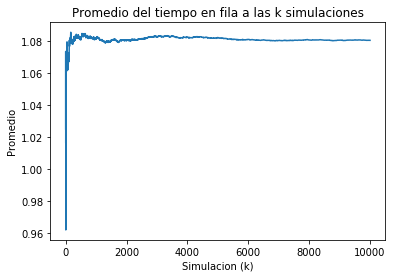

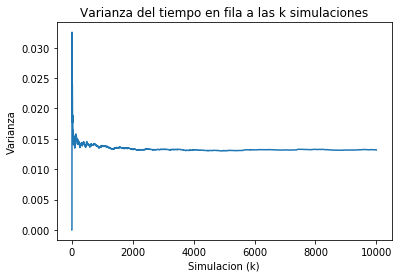

In [6]:
# Setup and start the simulation
random.seed(RANDOM_SEED)

promedio_desempeño_tiempo_fila_anterior = 0
promedio_desempeño_tiempo_fila = 0
varianza_tiempo_fila = 0

promedios = []
varianzas = []

for i in range(10000):
    tiempo_fila = []
    env = simpy.Environment()

    # Start processes and run
    counter = simpy.Resource(env, capacity=1)
    env.process(source(env, NEW_CUSTOMERS, INTERVAL_CUSTOMERS, counter))
    env.run()
    
    promedio_tiempo_fila = np.mean(tiempo_fila)
    
    if i >= 1:
        promedio_desempeño_tiempo_fila = media_recursiva(promedio_desempeño_tiempo_fila, promedio_tiempo_fila, i + 1)
    else:
        promedio_desempeño_tiempo_fila = promedio_tiempo_fila
        
    if i >= 2:
        varianza_tiempo_fila = varianza_recursiva(
            promedio_desempeño_tiempo_fila_anterior,
            promedio_desempeño_tiempo_fila,
            varianza_tiempo_fila,
            i + 1)
        
    promedio_desempeño_tiempo_fila_anterior = promedio_desempeño_tiempo_fila
    
    # print('X_{}: {}'.format(i + 1, promedio_desempeño_tiempo_fila))
    # print('S_{}: {}'.format(i + 1, varianza_tiempo_fila))
    # print('-----')
    
    promedios.append(promedio_desempeño_tiempo_fila)
    varianzas.append(varianza_tiempo_fila)
    
print('El valor del promedio en la última ejecución es de: {}'.format(promedios[-1]))
print('El valor de la varianza en la última ejecución es de: {}'.format(varianzas[-1]))
print('Se cumple la confianza: {}'.format(validar_confianza(varianzas[-1], len(varianzas))))
    
plt.title('Promedio del tiempo en fila a las k simulaciones')
plt.xlabel('Simulacion (k)')
plt.ylabel('Promedio')
plt.plot(promedios)
plt.show()


plt.title('Varianza del tiempo en fila a las k simulaciones')
plt.xlabel('Simulacion (k)')
plt.ylabel('Varianza')
plt.plot(varianzas)
plt.show()